<!DOCTYPE html>
<html>
<head>
<style>
  body {
    font-family: cursive;
  }

  .center {
    text-align: center;
  }

  .blue {
    color: blue;
  }

  .cursive {
    font-family: cursive;
  }

  .newtimeroman {
    font-family: newtimeroman;
  }

  .bigger-text {
    font-size: 250%; /* Adjust the font size as needed */
  }

  .uppercase {
    text-transform: uppercase;
  }
</style>
</head>
<body>

<!-- Centered Content -->
<div class="center">


  <!-- Task Description -->
 # <p><center style="font-family:newtimeroman;font-size:1080%;">BHARATH INTERN </center></p>
  </p>

 # <p class="cursive blue" style="font-size: 1080%;">TASK 3 </center></p>


# <p><center style="font-family:newtimeroman;font-size:1080%;">Dogs🐶 & Cats😺 Classifier </center></p>

  <!-- Image -->
  <div class="center">
    <img src="https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F12053762%2F3c94ab343f0e44a43b6f3563a7116373%2FXUGEPVQJJMI6LBP3WAQRGYECEI.jpg?generation=1695786557088668&alt=media" alt="Dogs and Cats">
  </div>

</div>

</body>
</html>


In [ ]:
from google.colab import files

# Upload the Kaggle API key to get info
uploaded = files.upload()


ModuleNotFoundError: No module named 'google.colab'

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:08<00:00, 45.3MB/s]
100% 812M/812M [00:08<00:00, 99.6MB/s]


<a id="section-1"></a>
<h1 style="background-color: #87CEFA; color: #000; text-align: center; border: 2px solid #000; border-radius: 10px; padding: 10px; box-shadow: 5px 5px 5px rgba(0, 0, 0, 0.75); transform: rotateX(10deg);">
  Import Libraries
</h1>

# 1 . Import Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import glob as gb
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg
from tqdm import tqdm
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.optimizers import Adam

from keras.applications import DenseNet121
from keras.applications import ResNet50V2
from keras.applications import ResNet152V2
from keras.applications import InceptionV3
from keras.applications import Xception

from google.colab.patches import cv2_imshow
from PIL import Image

<a id="section-1"></a>
<h1 style="background-color: #87CEFA; color: #000; text-align: center; border: 2px solid #000; border-radius: 10px; padding: 10px; box-shadow: 5px 5px 5px rgba(0, 0, 0, 0.75); transform: rotateX(10deg);">
  Preprocessing
</h1>

# 2.Preprocessing

In [5]:
# extracting the compressed dataset
from zipfile import ZipFile


dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')



The dataset is extracted


In [6]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/test1.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
import os

# counting the number of files in train folder

path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)

print('Number of images: ', file_count)

Number of images:  25000


In [9]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.2073.jpg', 'dog.10754.jpg', 'cat.10548.jpg', 'cat.6976.jpg', 'dog.7670.jpg', 'cat.11346.jpg', 'cat.12105.jpg', 'dog.1937.jpg', 'cat.8012.jpg', 'dog.9352.jpg', 'dog.5024.jpg', 'dog.4962.jpg', 'dog.4327.jpg', 'dog.6874.jpg', 'dog.12160.jpg', 'dog.8258.jpg', 'dog.2165.jpg', 'cat.6248.jpg', 'dog.11985.jpg', 'cat.3307.jpg', 'cat.11979.jpg', 'dog.12170.jpg', 'cat.5955.jpg', 'cat.1220.jpg', 'dog.2607.jpg', 'cat.5446.jpg', 'dog.11295.jpg', 'dog.11941.jpg', 'dog.9837.jpg', 'cat.6268.jpg', 'dog.3074.jpg', 'cat.9628.jpg', 'cat.7532.jpg', 'dog.2155.jpg', 'cat.11384.jpg', 'cat.413.jpg', 'cat.2412.jpg', 'cat.6019.jpg', 'cat.11963.jpg', 'cat.9274.jpg', 'dog.3669.jpg', 'cat.11344.jpg', 'dog.1104.jpg', 'cat.11170.jpg', 'dog.2984.jpg', 'dog.9025.jpg', 'cat.1188.jpg', 'dog.12301.jpg', 'dog.5047.jpg', 'cat.12292.jpg', 'dog.7579.jpg', 'dog.8866.jpg', 'cat.6607.jpg', 'dog.9556.jpg', 'cat.1239.jpg', 'dog.4511.jpg', 'cat.6242.jpg', 'dog.5176.jpg', 'dog.5348.jpg', 'dog.11874.jpg', 'cat.11400.jpg', 'cat.4

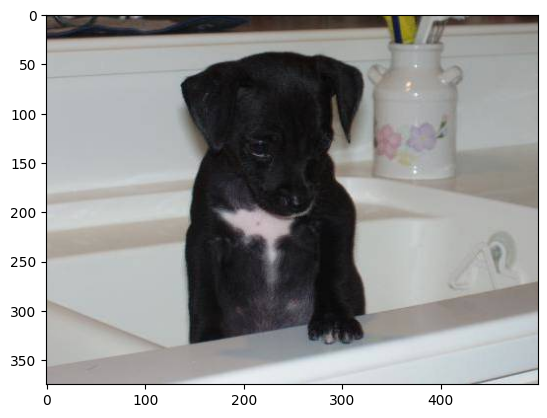

In [10]:

img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

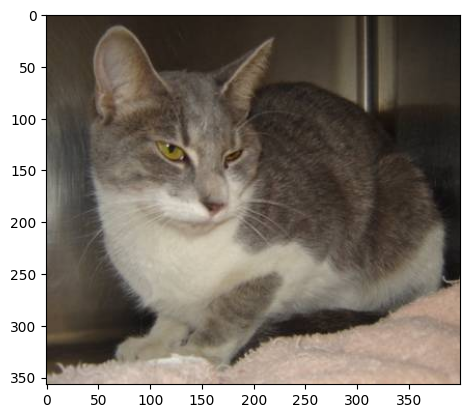

In [11]:
#display cat image

img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)

plt.show

In [12]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])

dog
dog
cat
cat
dog


In [13]:
file_names = os.listdir('/content/train/')

dog_count = 0

cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
      cat_count += 1

      print('Number of dog images =', dog_count)
      print('Number of cat images =', cat_count)

Streaming output truncated to the last 5000 lines.
Number of dog images = 10037
Number of cat images = 10001
Number of dog images = 10037
Number of cat images = 10002
Number of dog images = 10039
Number of cat images = 10003
Number of dog images = 10039
Number of cat images = 10004
Number of dog images = 10039
Number of cat images = 10005
Number of dog images = 10039
Number of cat images = 10006
Number of dog images = 10039
Number of cat images = 10007
Number of dog images = 10039
Number of cat images = 10008
Number of dog images = 10042
Number of cat images = 10009
Number of dog images = 10042
Number of cat images = 10010
Number of dog images = 10042
Number of cat images = 10011
Number of dog images = 10043
Number of cat images = 10012
Number of dog images = 10043
Number of cat images = 10013
Number of dog images = 10043
Number of cat images = 10014
Number of dog images = 10043
Number of cat images = 10015
Number of dog images = 10043
Number of cat images = 10016
Number of dog images 

In [14]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [15]:
original_folder = '/content/train/'

resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)

  img = img.resize((224, 224))

  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

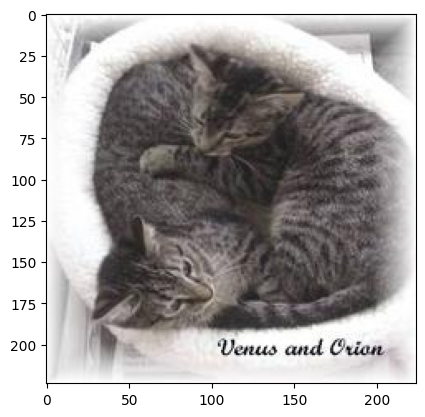

In [16]:
# display resized cat image

img = mpimg.imread('/content/image resized/cat.8296.jpg')
imgplt = plt.imshow(img)
plt.show()

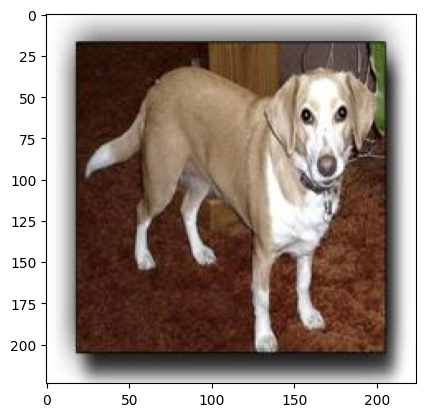

In [17]:
# display resized dog image

img = mpimg.imread('/content/image resized/dog.10158.jpg')
imgplt = plt.imshow(img)
plt.show()

Converting the resized labels as

Dog  - 1

Cat  - 0


In [18]:
# creaing a for Loop to assign Labels
filenames = os.listdir('/content/image resized/')

labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [19]:
print(filenames [0:5])

print(len(filenames))

['dog.2073.jpg', 'dog.10754.jpg', 'cat.10548.jpg', 'cat.6976.jpg', 'dog.7670.jpg']
2000


In [20]:
print(labels [0:5])
print(len(labels))

[1, 1, 0, 0, 1]
2000


In [21]:
#counting the images of dogs and cats out of 2000 images
values, counts = np.unique (labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 991 1009]


In [22]:
image_directory = '/content/image resized/'

image_extension = ['png', 'jpg']

files = []

[files.extend(gb.glob(image_directory +'*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [23]:
print(dog_cat_images)

[[[[100  94 141]
   [ 99  93 140]
   [ 98  92 139]
   ...
   [ 39  55  72]
   [ 22  39  60]
   [ 14  32  55]]

  [[ 91  85 132]
   [ 92  86 133]
   [ 94  88 135]
   ...
   [ 26  42  59]
   [ 16  33  54]
   [ 11  29  52]]

  [[ 77  71 118]
   [ 80  74 121]
   [ 86  80 127]
   ...
   [ 25  42  61]
   [ 17  36  57]
   [ 14  35  57]]

  ...

  [[ 77  92 108]
   [ 79  94 110]
   [ 81  96 112]
   ...
   [ 97 103 126]
   [100 106 129]
   [102 108 131]]

  [[ 76  93 106]
   [ 79  96 109]
   [ 82  98 114]
   ...
   [ 99 105 128]
   [103 109 132]
   [105 111 134]]

  [[ 78  95 108]
   [ 82  99 112]
   [ 86 102 118]
   ...
   [ 99 105 128]
   [102 108 131]
   [105 111 134]]]


 [[[219 186 171]
   [219 186 171]
   [219 186 171]
   ...
   [197 154 127]
   [196 153 126]
   [195 152 125]]

  [[219 186 171]
   [219 186 171]
   [219 186 171]
   ...
   [197 154 127]
   [196 153 126]
   [195 152 125]]

  [[219 186 171]
   [219 186 171]
   [219 186 171]
   ...
   [198 155 128]
   [197 154 127]
   [196 153

In [24]:
type(dog_cat_images)

numpy.ndarray

In [25]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [26]:
X = dog_cat_images

Y = np.asarray(labels)

Training the model

Train Test Split

Test = 20%  where Test = 0.20

Train = 80% where Train = 0.80

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [29]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [30]:
print(X_train_scaled)

[[[[0.05882353 0.05490196 0.07058824]
   [0.05098039 0.04705882 0.0627451 ]
   [0.04705882 0.04313725 0.05882353]
   ...
   [0.62352941 0.63529412 0.65490196]
   [0.62352941 0.63529412 0.65490196]
   [0.62352941 0.63529412 0.65490196]]

  [[0.05098039 0.04705882 0.0627451 ]
   [0.04705882 0.04313725 0.05882353]
   [0.04705882 0.04313725 0.05882353]
   ...
   [0.61960784 0.63137255 0.65098039]
   [0.62352941 0.63529412 0.65490196]
   [0.62352941 0.63529412 0.65490196]]

  [[0.04705882 0.04313725 0.05882353]
   [0.04313725 0.03921569 0.05490196]
   [0.04313725 0.03921569 0.05490196]
   ...
   [0.61960784 0.63137255 0.65098039]
   [0.62352941 0.63529412 0.65490196]
   [0.62352941 0.63529412 0.65490196]]

  ...

  [[0.58823529 0.5372549  0.52941176]
   [0.58823529 0.5372549  0.52941176]
   [0.59215686 0.54117647 0.53333333]
   ...
   [0.08627451 0.08627451 0.14117647]
   [0.04705882 0.04705882 0.10196078]
   [0.08235294 0.07843137 0.14117647]]

  [[0.58823529 0.5372549  0.52941176]
   [0.5

In [31]:
import tensorflow as tf
import tensorflow_hub as hub

In [32]:
import tensorflow as tf
import tensorflow_hub as hub

# Define the MobileNetV2 model URL
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4'

# Number of classes in your classification problem
NUM_CLASSES = 2

# Create a Keras layer using the MobileNetV2 model from TensorFlow Hub
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224, 224, 3))

# Create a simple classification model using the pretrained MobileNetV2
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(units=NUM_CLASSES, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 2)                 2004      
                                                                 
Total params: 3542269 (13.51 MB)
Trainable params: 2004 (7.83 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


In [33]:
model.compile(

  optimizer = 'adam',

  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),

  metrics = ['acc']

)

In [34]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 [==============================] - 57s 1s/step - loss: 0.2026 - acc: 0.9156
Epoch 2/5
50/50 [==============================] - 53s 1s/step - loss: 0.0548 - acc: 0.9794
Epoch 3/5
50/50 [==============================] - 52s 1s/step - loss: 0.0364 - acc: 0.9887
Epoch 4/5
50/50 [==============================] - 52s 1s/step - loss: 0.0280 - acc: 0.9925
Epoch 5/5
50/50 [==============================] - 53s 1s/step - loss: 0.0228 - acc: 0.9937


In [35]:
score, acc = model.evaluate(X_test_scaled, Y_test)

print('Test Loss =', score)

print('Test Accuracy =', acc)

13/13 [==============================] - 14s 1s/step - loss: 0.1160 - acc: 0.9675
Test Loss = 0.11599025875329971
Test Accuracy = 0.9674999713897705


Path of the image to be predicted: /content/test1/8290.jpg


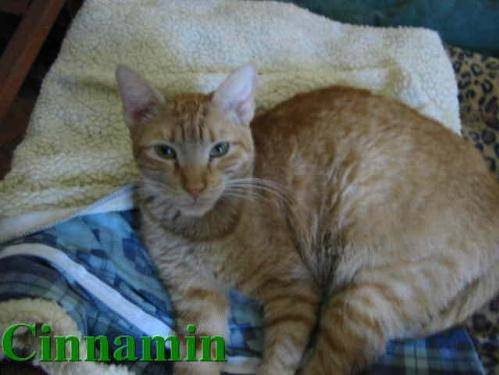

1/1 [==============================] - 1s 795ms/step
[[9.9998522e-01 1.4723809e-05]]
0
The image represents a Cat


In [36]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label= np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:

  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/test1/10202.jpg


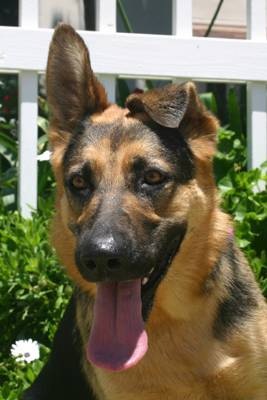

1/1 [==============================] - 0s 74ms/step
[[1.2174964e-04 9.9987829e-01]]
1
The image represents a Dog


In [40]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label= np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:

  print('The image represents a Cat')

else:
  print('The image represents a Dog')